In [62]:
# importi dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# load dataset
data = pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
# checking number of rows and columns
data.shape

(8523, 12)

In [65]:
# getting dataset stats
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [66]:
# checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [67]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [68]:
# transformig the objects in numebers
fat = {'Low Fat': 0, 
       'Regular' : 1,
       'LF': 0,
       'reg': 1,
       'low fat': 0}

type = {'Fruits and Vegetables':0,     
        "Snack Foods":1,
        "Household":2,
        "Frozen Foods":3,
        "Dairy":4,
        "Canned":5,
        "Baking Goods":6,
        "Health and Hygiene":7,
        "Soft Drinks":8,
        "Meat":9,
        "Breads":10,
        "Hard Drinks":11,
        "Others":12,
        "Starchy Foods":13,
        "Breakfast":14,
        "Seafood":15}

size = {'Small':0, 
        'Medium':1,
        'High':2}

location = {'Tier 1':0,
            'Tier 2': 1,
            'Tier 3':2}

outlet_type = {'Grocery Store':0,
            'Supermarket Type1': 1,
            'Supermarket Type2':2,
            'Supermarket Type3':3}




In [69]:
# applying map to transform the data
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(fat)
data['Item_Type'] = data['Item_Type'].map(type)
data['Outlet_Size'] = data['Outlet_Size'].map(size)
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map(location)
data['Outlet_Type'] = data['Outlet_Type'].map(outlet_type)

In [70]:
data['Outlet_Identifier'] = data['Outlet_Identifier'].map(lambda x: x.lstrip('OUT'))


In [71]:
#checking if the transformation is correctly applied
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,049,1999,1.0,0,1,3735.1380
1,DRC01,5.92,1,0.019278,8,48.2692,018,2009,1.0,2,2,443.4228
2,FDN15,17.50,0,0.016760,9,141.6180,049,1999,1.0,0,1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,010,1998,NaN,2,0,732.3800
4,NCD19,8.93,0,0.000000,2,53.8614,013,1987,2.0,2,1,994.7052


In [72]:
# checking if there are null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [73]:
# import simple imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'mean') # impute mean values on null 

data['Item_Weight'] = imputer.fit_transform(data[['Item_Weight']])

In [74]:
#imputer = SimpleImputer(strategy= 'most_frequent')

#data['Outlet_Size'] = imputer.fit_transform(data[['Outlet_Size']])

In [75]:
# checking if there are null values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [76]:
# creating a pivot table to identify a relation between Outlet Size and Outlet Type
mode_outlet = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_outlet = mode_outlet.astype(int)

In [77]:
# identify in the column Outlet Size which  values are missing
missing_values = data['Outlet_Size'].isnull()
missing_values = missing_values.astype(int)
print(missing_values)

0       0
1       0
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    0
8522    0
Name: Outlet_Size, Length: 8523, dtype: int64


In [78]:
# applying a function to the missing values in order to identify the Outlet Tyoe usinf the mode_outlet
data.loc[missing_values == 1, 'Outlet_Size'] = data.loc[missing_values == 1, 'Outlet_Type'].astype(int).apply(lambda x: mode_outlet[x])

In [79]:
#checking if the function is correctly applied
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,049,1999,1.0,0,1,3735.1380
1,DRC01,5.92,1,0.019278,8,48.2692,018,2009,1.0,2,2,443.4228
2,FDN15,17.50,0,0.016760,9,141.6180,049,1999,1.0,0,1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,010,1998,0.0,2,0,732.3800
4,NCD19,8.93,0,0.000000,2,53.8614,013,1987,2.0,2,1,994.7052


In [80]:
# checking if there are null values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

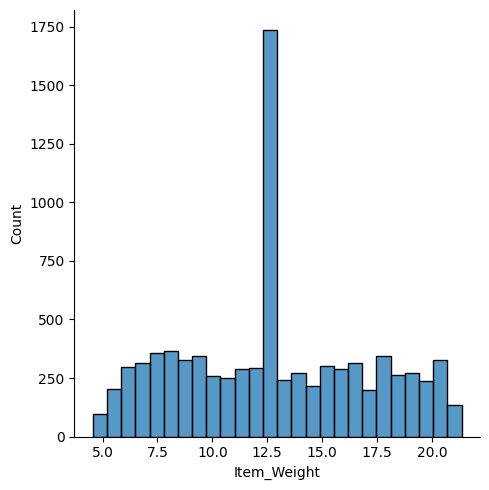

In [81]:
# plotting item weight graph
sns.displot(data['Item_Weight'])

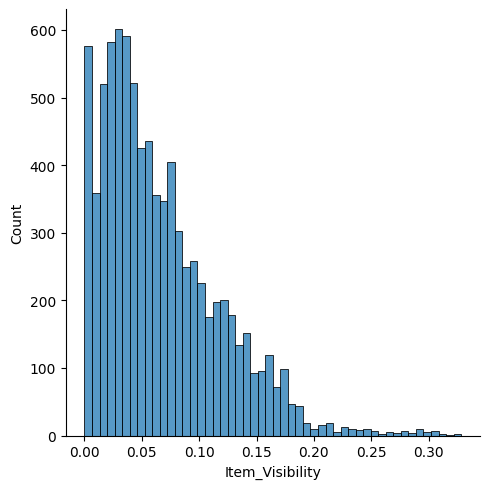

In [82]:
# plotting item weight graph

sns.displot(data['Item_Visibility'])

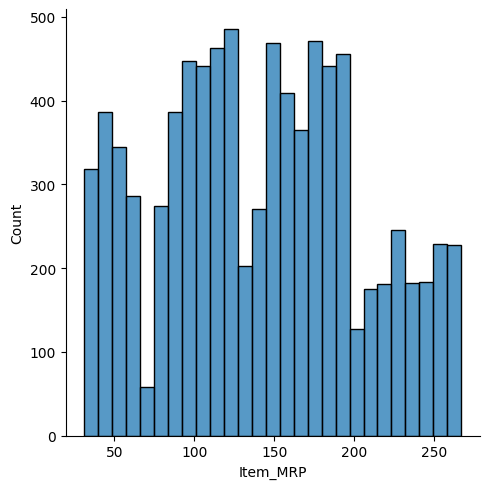

In [83]:
# plotting item MRP graph

sns.displot(data['Item_MRP'])

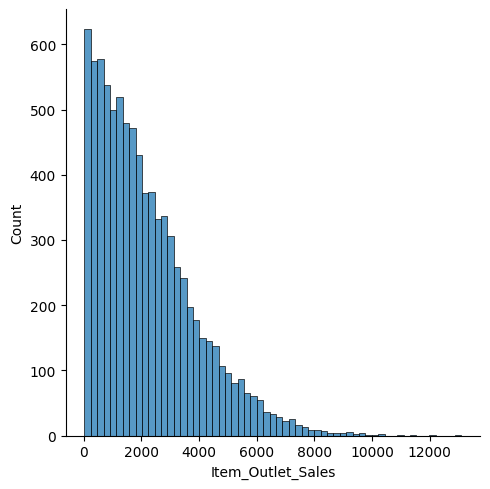

In [84]:
# plotting item outlet sales graph

sns.displot(data['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

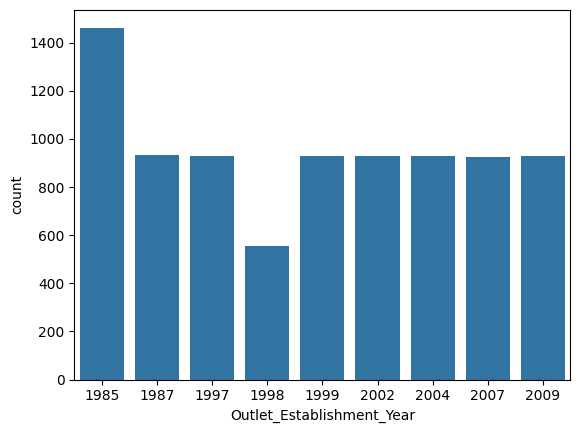

In [85]:
# plotting outlet establishment year graph

sns.countplot(x=data['Outlet_Establishment_Year'], data=data)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

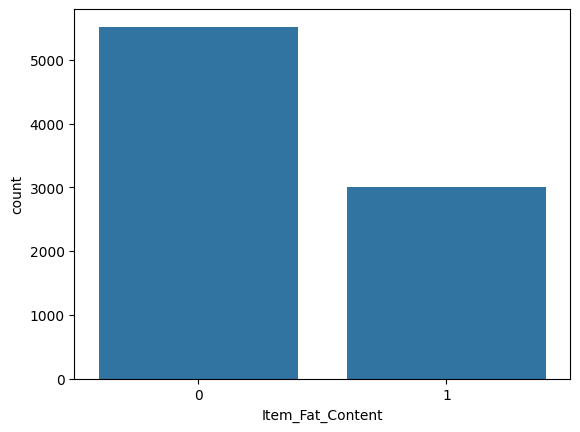

In [86]:
# plotting item fat content graph

sns.countplot(x=data['Item_Fat_Content'], data=data)

<Axes: xlabel='Item_Type', ylabel='count'>

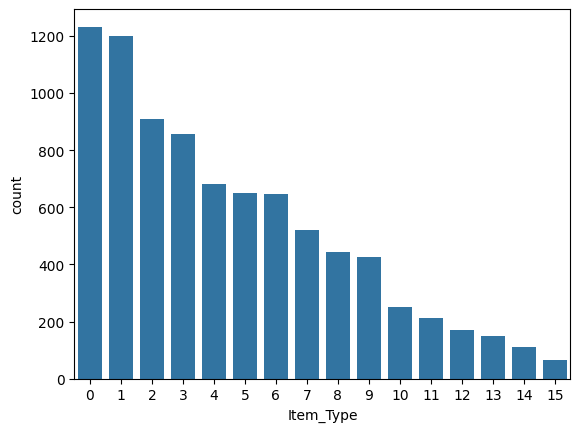

In [87]:
# plotting item type graph

sns.countplot(x=data['Item_Type'], data=data)

<Axes: xlabel='Outlet_Size', ylabel='count'>

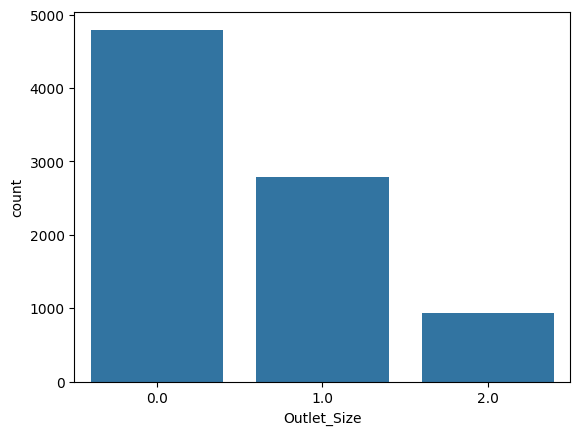

In [88]:
# plotting outlet size graph

sns.countplot(x='Outlet_Size', data=data)

In [89]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,049,1999,1.0,0,1,3735.1380
1,DRC01,5.92,1,0.019278,8,48.2692,018,2009,1.0,2,2,443.4228
2,FDN15,17.50,0,0.016760,9,141.6180,049,1999,1.0,0,1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,010,1998,0.0,2,0,732.3800
4,NCD19,8.93,0,0.000000,2,53.8614,013,1987,2.0,2,1,994.7052


In [90]:
#checking all the column items for a random product
data.iloc[3, :]

Item_Identifier                FDX07
Item_Weight                     19.2
Item_Fat_Content                   1
Item_Visibility                  0.0
Item_Type                          0
Item_MRP                     182.095
Outlet_Identifier                010
Outlet_Establishment_Year       1998
Outlet_Size                      0.0
Outlet_Location_Type               2
Outlet_Type                        0
Item_Outlet_Sales             732.38
Name: 3, dtype: object

In [91]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#encoding the item identifier
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,049,1999,1.0,0,1,3735.1380
1,8,5.92,1,0.019278,8,48.2692,018,2009,1.0,2,2,443.4228
2,662,17.50,0,0.016760,9,141.6180,049,1999,1.0,0,1,2097.2700
3,1121,19.20,1,0.000000,0,182.0950,010,1998,0.0,2,0,732.3800
4,1297,8.93,0,0.000000,2,53.8614,013,1987,2.0,2,1,994.7052


In [92]:
# changing the type to int
data['Outlet_Identifier'] = data['Outlet_Identifier'].astype(int)

In [93]:
# splitting the data in feature and target
X = data.drop(['Item_Outlet_Sales'], axis=1)
y =data['Item_Outlet_Sales']

In [94]:
# splitting the data in train and test samples
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [96]:
# importing XGBoost Regressor
from xgboost import XGBRegressor

In [97]:
# training the model
model = XGBRegressor()

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
# prediction the train sample
pred_train = model.predict(X_train)

In [99]:
# importing metrics
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

#applying the metrics
score = r2_score(y_train, pred_train)
mae = mean_absolute_error(y_train, pred_train)
rmse = root_mean_squared_error(y_train, pred_train)
print('R2 score is ', score, '\n')
print('Mean absolute error is ', mae, '\n')
print('Root mean squared error is ', rmse, '\n')

R2 score is  0.8874519012487326 

Mean absolute error is  407.8448500473369 

Root mean squared error is  564.7514493760283 



Text(0.5, 1.0, 'Actual vs Predicted Price - Train')

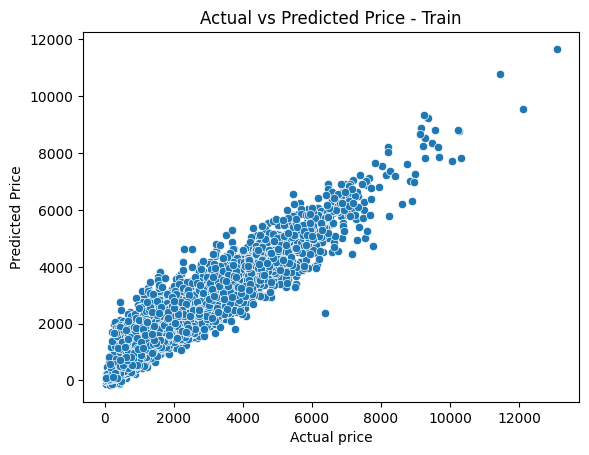

In [100]:
# plotting the Actual vs Predicted prices
sns.scatterplot(x=y_train, y=pred_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Train')

In [101]:
# prediction test sample
pred_test = model.predict(X_test)

#applying the metrics
score = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
rmse = root_mean_squared_error(y_test, pred_test)
print('R2 score is ', score, '\n')
print('Mean absolute error is ', mae, '\n')
print('Root mean squared error is ', rmse, '\n')

R2 score is  0.538400834988682 

Mean absolute error is  844.3215325441407 

Root mean squared error is  1194.699448978172 



Text(0.5, 1.0, 'Actual vs Predicted Price - Test')

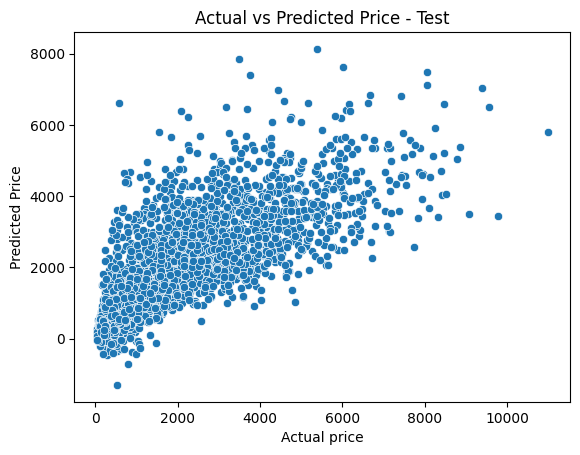

In [102]:
# plotting the Actual vs Predicted prices
sns.scatterplot(x=y_test, y=pred_test)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Test')

### Trying other models: Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(X_train, y_train)

pred_linear = linear.predict(X_train)

score = r2_score(y_train, pred_linear)
mae = mean_absolute_error(y_train, pred_linear)
rmse = root_mean_squared_error(y_train, pred_linear)
print('R2 score is ', score, '\n')
print('Mean absolute error is ', mae, '\n')
print('Root mean squared error is ', rmse, '\n')

R2 score is  0.5053048534133668 

Mean absolute error is  887.8286339888139 

Root mean squared error is  1184.0147084749199 



Text(0.5, 1.0, 'Actual vs Predicted Price - Train')

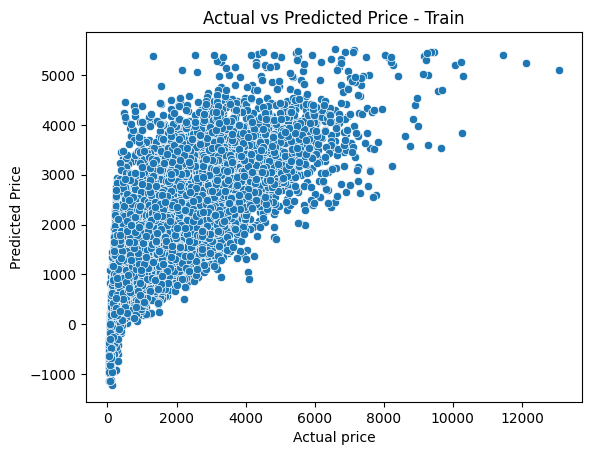

In [121]:
sns.scatterplot(x=y_train, y=pred_linear)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Train')

In [115]:
pred_linear_test = linear.predict(X_test)

score_linear_test = r2_score(y_test, pred_linear_test)

score = r2_score(y_test, pred_linear_test)
mae = mean_absolute_error(y_test, pred_linear_test)
rmse = root_mean_squared_error(y_test, pred_linear_test)
print('R2 score is ', score, '\n')
print('Mean absolute error is ', mae, '\n')
print('Root mean squared error is ', rmse, '\n')

R2 score is  0.5163445136264981 

Mean absolute error is  914.5127531213724 

Root mean squared error is  1222.9092089425483 



Text(0.5, 1.0, 'Actual vs Predicted Price - Test')

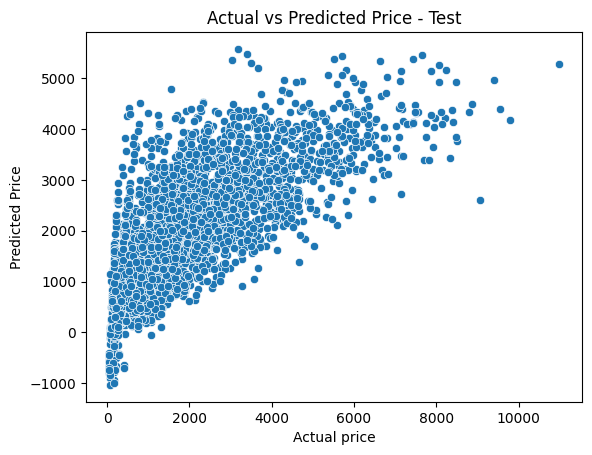

In [116]:
sns.scatterplot(x=y_test, y=pred_linear_test)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Test')

### Trying other models: Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()

regressor.fit(X_train, y_train)

pred_regressor = regressor.predict(X_train)

score = r2_score(y_train, pred_regressor)
mae = mean_absolute_error(y_train, pred_regressor)
rmse = root_mean_squared_error(y_train, pred_regressor)
print('R2 score is ', score, '\n')
print('Mean absolute error is ', mae, '\n')
print('Root mean squared error is ', rmse, '\n')

R2 score is  0.6390840006548002 

Mean absolute error is  716.8713393401048 

Root mean squared error is  1011.3263899206171 



Text(0.5, 1.0, 'Actual vs Predicted Price - Train')

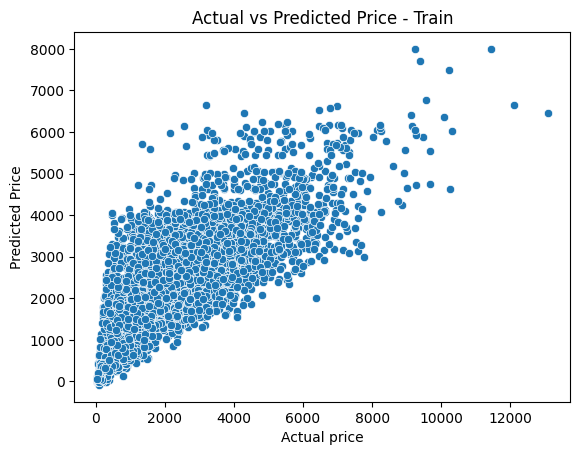

In [118]:
sns.scatterplot(x=y_train, y=pred_regressor)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Train')

In [119]:
pred_regressor_test = regressor.predict(X_test)

score_regressor_test = r2_score(y_test, pred_regressor_test)

sscore = r2_score(y_test, pred_regressor_test)
mae = mean_absolute_error(y_test, pred_regressor_test)
rmse = root_mean_squared_error(y_test, pred_regressor_test)
print('R2 score is ', score, '\n')
print('Mean absolute error is ', mae, '\n')
print('Root mean squared error is ', rmse, '\n')

R2 score is  0.6390840006548002 

Mean absolute error is  772.2190552052066 

Root mean squared error is  1114.3507670846298 



Text(0.5, 1.0, 'Actual vs Predicted Price - Test')

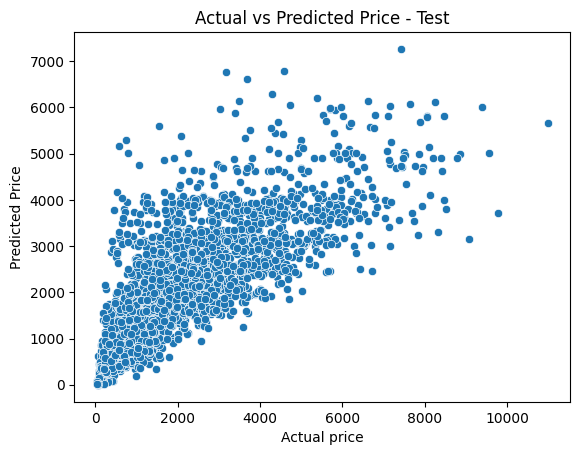

In [120]:
sns.scatterplot(x=y_test, y=pred_regressor_test)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price - Test')